# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:

url = "http://api.openweathermap.org/data/2.5/weather?"

cities_lat = []
cities_lng = []
cities_temp = []
cities_hum = []
cities_cld = []
cities_wnd = []


index = 1
print("""
    
-----------------------------
""")
for city in cities[:]:

    query_url = url+"appid="+"c3ca6749e3914cd1d69552dcd8a58f73"+ "&q="+city
    weather_json = requests.get(query_url+'&units=imperial').json()

    if(weather_json['cod'] != 200):
        print("Skipping city not found in weather map API...")

        cities.remove(city)
    else:
        print(f"Processing Record {index} of Set {(index//50)+1} | {city}")

        cities_lat.append(weather_json['coord']['lat'])
        cities_lng.append(weather_json['coord']['lon'])
        cities_temp.append(weather_json['main']['temp_max'])
        cities_hum.append(weather_json['main']['humidity'])
        cities_cld.append(weather_json['clouds']['all'])
        cities_wnd.append(weather_json['wind']['speed'])
        index += 1



    
-----------------------------

Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | aviles
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | saint george
Skipping city not found in weather map API...
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | pacific grove
Processing Record 11 of Set 1 | atuona
Skipping city not found in weather map API...
Processing Record 12 of Set 1 | viedma
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | aykhal
Processing Record 15 of Set 1 | kamenka
Processing Record 16 of Set 1 | kavieng
Processing Record 17 of Set 1 | ostrovnoy
Processing Record 18 of Set 1 | morshansk
Processing Record 19 of Set 1 | golden
Processing Record 20 of Set 1 | smithers
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 

Processing Record 175 of Set 4 | vagur
Processing Record 176 of Set 4 | palmer
Processing Record 177 of Set 4 | oistins
Processing Record 178 of Set 4 | avarua
Processing Record 179 of Set 4 | faya
Processing Record 180 of Set 4 | nishihara
Processing Record 181 of Set 4 | meleuz
Processing Record 182 of Set 4 | itaituba
Processing Record 183 of Set 4 | acandi
Processing Record 184 of Set 4 | coxim
Processing Record 185 of Set 4 | carora
Processing Record 186 of Set 4 | namibe
Processing Record 187 of Set 4 | wewak
Processing Record 188 of Set 4 | preston
Processing Record 189 of Set 4 | raudeberg
Processing Record 190 of Set 4 | isangel
Processing Record 191 of Set 4 | ulladulla
Processing Record 192 of Set 4 | ballina
Processing Record 193 of Set 4 | bethel
Processing Record 194 of Set 4 | oussouye
Processing Record 195 of Set 4 | wanning
Processing Record 196 of Set 4 | tuxpan
Processing Record 197 of Set 4 | fairbanks
Processing Record 198 of Set 4 | kaspiysk
Processing Record 199 

Processing Record 349 of Set 7 | havre-saint-pierre
Skipping city not found in weather map API...
Processing Record 350 of Set 8 | katangli
Processing Record 351 of Set 8 | port macquarie
Processing Record 352 of Set 8 | penzance
Skipping city not found in weather map API...
Processing Record 353 of Set 8 | rajaldesar
Processing Record 354 of Set 8 | provideniya
Processing Record 355 of Set 8 | san andres
Processing Record 356 of Set 8 | tessalit
Processing Record 357 of Set 8 | boo
Processing Record 358 of Set 8 | grand-lahou
Processing Record 359 of Set 8 | bagdarin
Processing Record 360 of Set 8 | chimbote
Processing Record 361 of Set 8 | alofi
Processing Record 362 of Set 8 | sinnamary
Skipping city not found in weather map API...
Processing Record 363 of Set 8 | milkovo
Processing Record 364 of Set 8 | manzanillo
Processing Record 365 of Set 8 | kardla
Processing Record 366 of Set 8 | escada
Processing Record 367 of Set 8 | berdigestyakh
Processing Record 368 of Set 8 | yatou
Skip

Processing Record 517 of Set 11 | matara
Processing Record 518 of Set 11 | seoul
Processing Record 519 of Set 11 | syracuse
Processing Record 520 of Set 11 | el alto
Processing Record 521 of Set 11 | tucurui
Processing Record 522 of Set 11 | dhidhdhoo
Processing Record 523 of Set 11 | fukue
Processing Record 524 of Set 11 | torbay
Processing Record 525 of Set 11 | koboko
Processing Record 526 of Set 11 | manica
Processing Record 527 of Set 11 | saint-francois
Processing Record 528 of Set 11 | millinocket
Processing Record 529 of Set 11 | yinchuan
Processing Record 530 of Set 11 | manokwari
Processing Record 531 of Set 11 | khvoynaya
Processing Record 532 of Set 11 | diffa
Processing Record 533 of Set 11 | wichita falls
Processing Record 534 of Set 11 | javanrud
Processing Record 535 of Set 11 | marsabit
Processing Record 536 of Set 11 | rota
Processing Record 537 of Set 11 | sao filipe
Processing Record 538 of Set 11 | abonnema
Processing Record 539 of Set 11 | pushchino
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
weather_data = {"City_Name" : cities,
                               "Lattitude" : cities_lat,
                               "Longitude": cities_lng,
                               "Temperature(F)" : cities_temp,
                               "Humidity": cities_hum,
                               "Cloudiness": cities_cld,
                               "Windiness(mph)": cities_wnd}
weather_data = pd.DataFrame(weather_data)

weather_data.to_csv("CityWeatherData_New.csv", index=False)

In [21]:
weather_data.head()

,City_Name,Lattitude,Longitude,Temperature(F),Humidity,Cloudiness,Windiness(mph)
0,tiksi,71.64,128.87,-39.20,82,32,3.04
1,busselton,-33.64,115.35,64.08,100,76,10.76
2,aviles,43.55,-5.92,48.20,76,75,6.93
3,rikitea,-23.12,-134.97,80.82,99,0,14.00
4,saint george,39.45,22.34,42.80,93,40,3.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

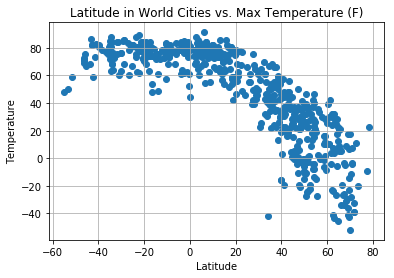

In [22]:
plt.scatter(cities_lat, cities_temp, marker="o")

plt.title("Latitude in World Cities vs. Max Temperature (F)")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("MaxTempInWorldCities.png")


plt.show()

#### Latitude vs. Humidity Plot

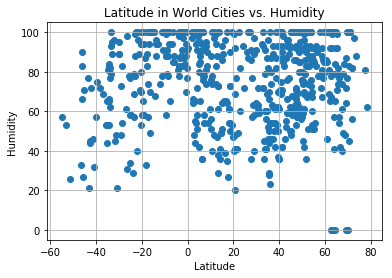

In [23]:
plt.scatter(cities_lat, cities_hum, marker="o")

# Incorporate the other graph properties
plt.title("Latitude in World Cities vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

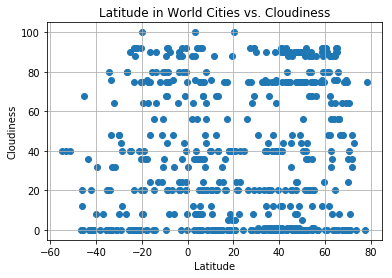

In [24]:
# Build a scatter plot for each data type 
#Cloudiness (%) vs. Latitude

plt.scatter(cities_lat, cities_cld, marker="o")

# Incorporate the other graph properties
plt.title("Latitude in World Cities vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

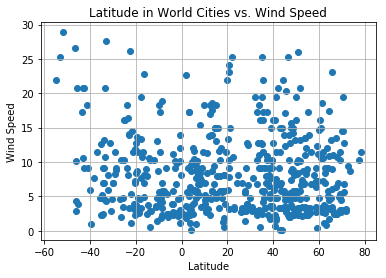

In [25]:

# Build a scatter plot for each data type 
#Wind Speed (mph) vs. Latitude

plt.scatter(cities_lat, cities_wnd, marker="o")

# Incorporate the other graph properties
plt.title("Latitude in World Cities vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()